In [2]:
!pip install pandas-datareader

You should consider upgrading via the 'c:\users\aniket kumar\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
url=input()
df=pd.read_csv(url)
df.head()

HR_comma_sep.csv


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df[df.left==1].left.count() #leave

3571

In [10]:
df[df.left==0].left.count() #not leave

11428

In [11]:
11428+ 3571

14999

,satisfaction_level,left
satisfaction_level,1.000000,-0.388375
left,-0.388375,1.000000


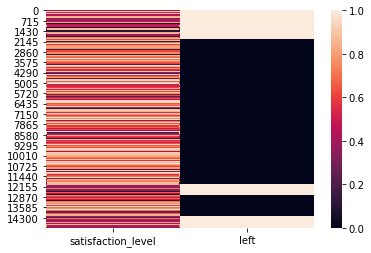

In [17]:
x=df[["satisfaction_level","left"]]
corr=x.corr()
sns.heatmap(x)
corr

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


<AxesSubplot:>

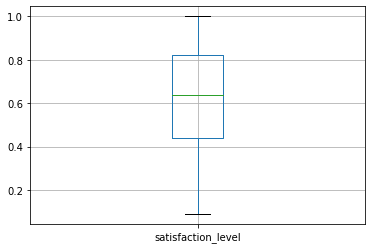

In [23]:
df.boxplot(column="satisfaction_level")

<AxesSubplot:>

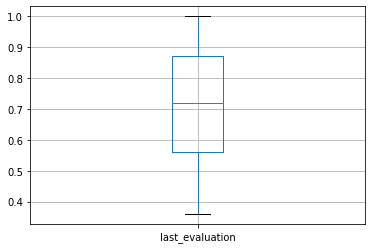

In [24]:
df.boxplot(column="last_evaluation")

In [25]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

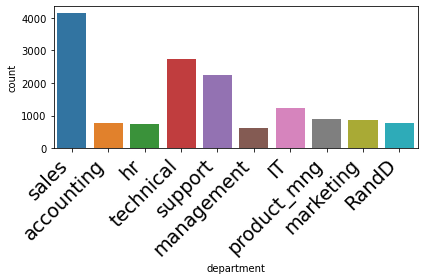

In [63]:
a=sns.countplot(x="department",data=df)

a.set_xticklabels(a.get_xticklabels(), fontsize=19,rotation=45,ha="right")
plt.tight_layout()

In [7]:
df[df["satisfaction_level"]>=0.61].satisfaction_level.count()

8270

In [9]:
14999-8270 #means 6729 peoples are satisfied and 8270 unsatisfied

6729

In [22]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [29]:
df1=df[df["satisfaction_level"]<0.61].department.value_counts()

#unsatisfied employee of diff. dept based on satisfication score

sales          1858
technical      1227
support         983
IT              521
product_mng     410
accounting      383
marketing       375
hr              356
RandD           338
management      278
Name: department, dtype: int64

In [23]:
df1=df[df["satisfaction_level"]>=0.61].department.value_counts()

#satisfied employess

sales          2282
technical      1493
support        1246
IT              706
product_mng     492
marketing       483
RandD           449
accounting      384
hr              383
management      352
Name: department, dtype: int64

In [24]:
df[df["satisfaction_level"]>=0.61].department.value_counts()-df[df["satisfaction_level"]<0.61].department.value_counts()

#counts of unsatisfied employee

#it's the difference between unsatisfied employees and satisfied employees

IT             185
RandD          111
accounting       1
hr              27
management      74
marketing      108
product_mng     82
sales          424
support        263
technical      266
Name: department, dtype: int64

In [32]:
df1=df[df["satisfaction_level"]<0.61]
df1 #unsatisfied

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [38]:
df2=df[df["satisfaction_level"]>=0.61]
df2 #satisfied

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.91,0.99,5,254,5,0,1,0,technical,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low
14987,0.90,0.70,5,206,4,0,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low


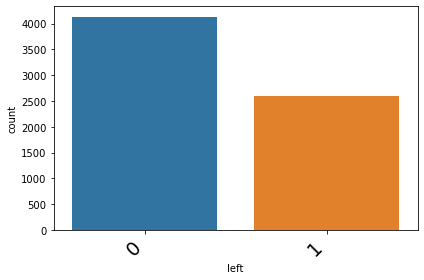

In [34]:
a=sns.countplot(x="left",data=df1)

a.set_xticklabels(a.get_xticklabels(), fontsize=19,rotation=45,ha="right")
plt.tight_layout()

#unsatisfied

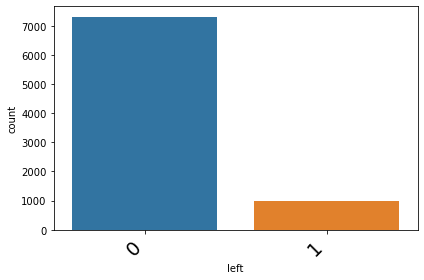

In [40]:
a=sns.countplot(x="left",data=df2)

a.set_xticklabels(a.get_xticklabels(), fontsize=19,rotation=45,ha="right")
plt.tight_layout() #satisfiedd

In [12]:
df2=df[df["satisfaction_level"]<=0.61]
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
salary_count=df[["salary","left"]].groupby(["salary","left"]).size()
salary_count

salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
dtype: int64

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.last_evaluation.unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [5]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [7]:
categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [9]:
for c_feature in categorical_features:
  hr_df = create_dummies( df, c_feature )

In [10]:
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,1,0
